# Praktikum 1

Klasifikasi SVM dengan Data Dummy Linier
Pengantar

Pada praktikum ini membutuhkan dataset untuk diolah datanya menjadi sebuah analisis dari luaran metode SVM yang dijalankan. Ikuti petunjuk dari dosen pengampu mengenai data apa saja yang boleh dipakai serta karakteristik yang sesuai untuk kegiatan praktikum kali ini. Data yang ditampilkan pada jobsheet hanya sebuah contoh, mahasiswa harus mencari data sendiri dan memastikan data yang diperoleh tersebut sesuai dengan kasus yang dapat diselesaikan dengan SVM.

## Langkah 1 - Import Library


In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Langkah 2 - Membuat Data Dummy

Pada praktikum ini, model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

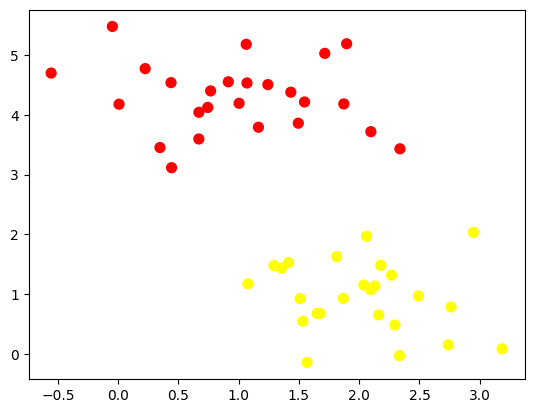

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Langkah 3 - Buat Ilustrasi Garis Pemisah

Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

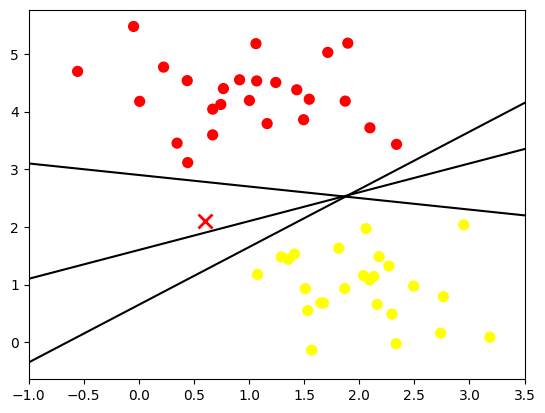

In [3]:
xfit = np.linspace(-1, 3.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Buat beberapa garis pemisah
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.show()

## Langkah 4 - Ilustrasi Margin

Margin dalam suatu garis juga dapat digunakan untuk memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

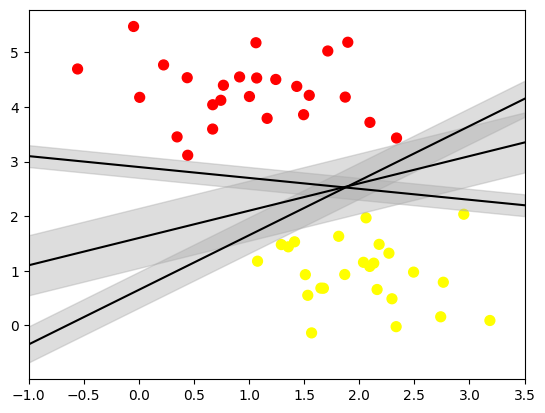

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

## Langkah 5 - Fitting Model

Selanjutnya, kita akan melakukan pelatihan terhadap model SVM. Model kali ini akan menggunakan fungsi (kernel) dengan jenis linier.

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

,C,10000000000.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Selanjutnya buat fungsi untuk membantu visualisasi hasil fit model.

In [6]:
# buat sebuah fungsi untuk menampilkan fitting data (dioptimalkan)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model (dikurangi dari 30 ke 20 untuk kecepatan)
    x = np.linspace(xlim[0], xlim[1], 20)
    y = np.linspace(ylim[0], ylim[1], 20)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Lakukan plotting dengan fungsi yang telah dibuat.

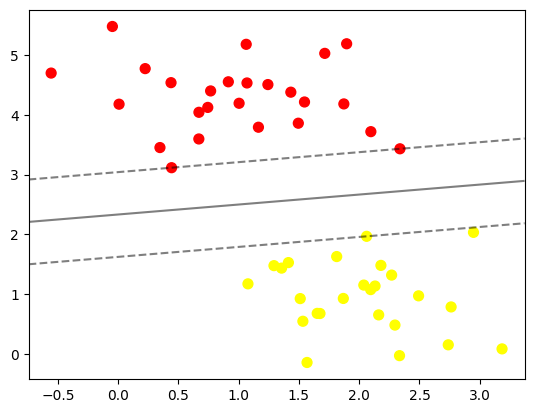

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

Beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector. Untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

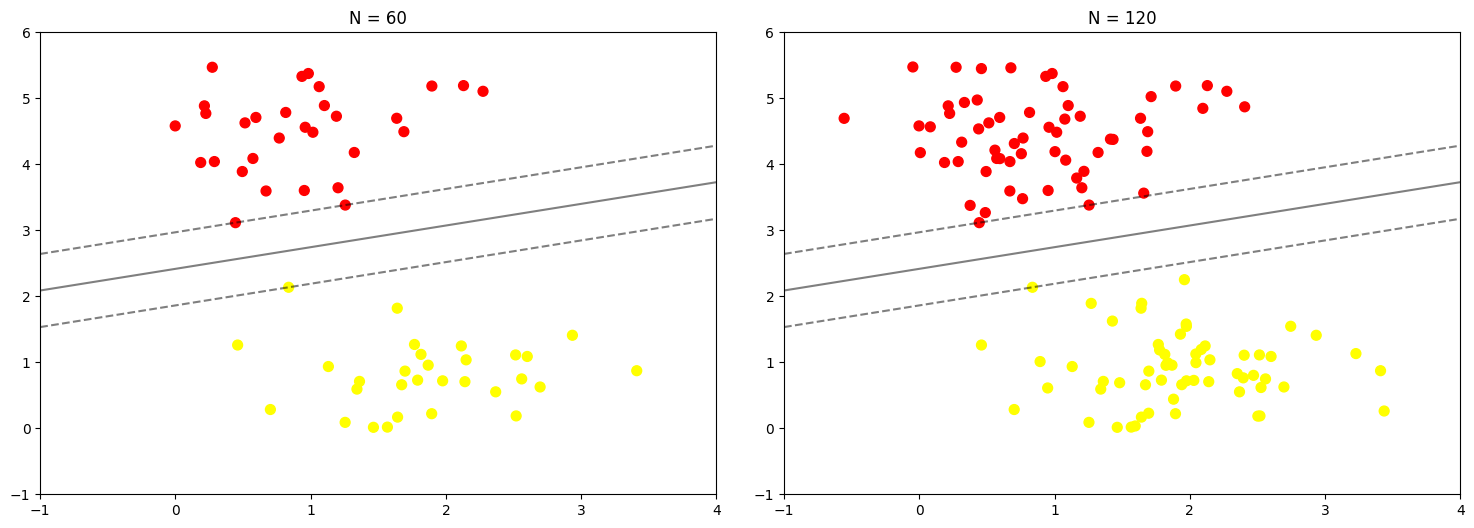

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Berdasarkan hasil di atas, perubahan jumlah data tidak mempengaruhi model yang digunakan. Ilustrasi lebih jelas dapat dilihat pada diagram di bawah ini

In [10]:
from ipywidgets import interact, IntSlider, fixed
interact(plot_svm, N=IntSlider(min=10, max=200, step=10, value=60), ax=fixed(None))

interactive(children=(IntSlider(value=60, description='N', max=200, min=10, step=10), Output()), _dom_classes=…

<function __main__.plot_svm(N=10, ax=None)>